### 경희대학교 산업경영공학과 김태호(2015100915)

# 2016년 1년간 기차역간 수송량 분석 및 마케팅 활용 방안

#### 기차역간 수송량이 나와 있는 데이터를 이용하여 알아보기 편하게 catogram으로 시각화 한 후 서로 수송량이 높은 역들을 알아내어 코레일에서 어떻게 해야 효율적으로 마케팅을 할 수 있을지 알아본다

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [2]:
raw_data = pd.read_excel("../data/한국철도공사_2016년_역간_OD자료.xlsx",header=3)
raw_data

,착 역 Destination Station 발 역 Origin Station,Unnamed: 1,Unnamed: 2,서울,영등포,수원,평택,천안아산,조치원,신탄진,...,함안,진주,하동,광양,보성,화순,광명,울산,포항,합계
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Seoul,Yeongdeungpo,Suwon,Pyeongtaek,CheonanAsan,Jochiwon,Sintanjin,...,Haman,Jinju,Hadong,Gwangyang,Boseong,Hwasun,Gwangmyeong,Ulsan,Pohang,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,서울,NaN,Seoul,0,121705,1335737,686491,1895049,234574,102706,...,496,57863,NaN,NaN,5063,825,NaN,1149024,514896,23793106
5,영등포,NaN,Yeongdeungpo,128006,NaN,1105671,687801,1044996,289795,111471,...,323,15606,NaN,NaN,4523,757,NaN,NaN,NaN,8549279
6,수원,NaN,Suwon,1376031,1081174,0,416542,708650,310272,94906,...,631,742,NaN,NaN,3250,750,NaN,68833,54,6856996
7,평택,NaN,Pyeongtaek,676230,671865,436359,0,85608,102991,35009,...,105,324,NaN,NaN,539,180,NaN,NaN,NaN,2679023
8,천안아산,NaN,CheonanAsan,1877918,1043413,743602,102383,0,292550,90450,...,134,2226,NaN,NaN,1055,155,NaN,150636,65829,7292509
9,조치원,NaN,Jochiwon,217282,295297,309929,101210,290647,0,36186,...,337,265,NaN,NaN,439,132,NaN,14,2,1953562


* 필요없는 부분을 제거한다.

In [3]:
del raw_data['Unnamed: 1']
del raw_data['Unnamed: 2']
raw_data.drop([0],inplace=True)
raw_data.drop([1],inplace=True)
raw_data.drop([2],inplace=True)
raw_data.drop([3],inplace=True)
raw_data.rename(columns={raw_data.columns[0]:"ID"}, inplace=True)
raw_data.reset_index(inplace=True)
del raw_data['index']
raw_data.head()

,ID,서울,영등포,수원,평택,천안아산,조치원,신탄진,대전,옥천,...,함안,진주,하동,광양,보성,화순,광명,울산,포항,합계
0,서울,0,121705,1335737,686491,1895049,234574,102706,2900921,25100,...,496,57863,NaN,NaN,5063,825,NaN,1149024,514896,23793106
1,영등포,128006,NaN,1105671,687801,1044996,289795,111471,922881,22288,...,323,15606,NaN,NaN,4523,757,NaN,NaN,NaN,8549279
2,수원,1376031,1081174,0,416542,708650,310272,94906,684726,17408,...,631,742,NaN,NaN,3250,750,NaN,68833,54,6856996
3,평택,676230,671865,436359,0,85608,102991,35009,244432,6625,...,105,324,NaN,NaN,539,180,NaN,NaN,NaN,2679023
4,천안아산,1877918,1043413,743602,102383,0,292550,90450,792067,14809,...,134,2226,NaN,NaN,1055,155,NaN,150636,65829,7292509


* NaN 인 값을 0으로 바꿔준다.

* 값들의 **최대값과 최소값이 차이가 너무 크기때문에 비교하기가 힘들어** 모든 값에 1을 더하고(log0은 -inf이기 때문에 0을 1로 바꿔준다.) log를 씌운다.

In [4]:
raw_data.fillna(0, inplace=True)
raw_data.rename(columns = {'합계':'탑승'}, inplace=True)
raw_data['하차']= list(raw_data.iloc[105,:])[1:]
raw_data.drop([105],inplace=True)
raw_data['탑승-하차']= raw_data['탑승']-raw_data['하차']
raw_data.head()

,ID,서울,영등포,수원,평택,천안아산,조치원,신탄진,대전,옥천,...,하동,광양,보성,화순,광명,울산,포항,탑승,하차,탑승-하차
0,서울,0,121705,1335737,686491,1895049,234574,102706,2900921,25100,...,0,0,5063,825,0,1149024,514896,23793106,24290985,-497879
1,영등포,128006,0,1105671,687801,1044996,289795,111471,922881,22288,...,0,0,4523,757,0,0,0,8549279,8559289,-10010
2,수원,1376031,1081174,0,416542,708650,310272,94906,684726,17408,...,0,0,3250,750,0,68833,54,6856996,6917681,-60685
3,평택,676230,671865,436359,0,85608,102991,35009,244432,6625,...,0,0,539,180,0,0,0,2679023,2667166,11857
4,천안아산,1877918,1043413,743602,102383,0,292550,90450,792067,14809,...,0,0,1055,155,0,150636,65829,7292509,7274913,17596


* 역의 탑승량과 하차량을 비교하기 위하여 **'탑승-하차'** 데이터도 만든다.

In [5]:
raw_data_p1 = raw_data.iloc[:,1:].applymap(lambda x : np.log(float(x)+1))
raw_data = pd.concat([raw_data.iloc[:,0:1],raw_data_p1],axis = 1)
raw_data

C:\Users\study\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,ID,서울,영등포,수원,평택,천안아산,조치원,신탄진,대전,옥천,...,하동,광양,보성,화순,광명,울산,포항,탑승,하차,탑승-하차
0,서울,0.000000,11.709364,14.104995,13.439350,14.454756,12.365531,11.539636,14.880539,10.130663,...,0.000000,0.000000,8.529912,6.716595,0.000000,13.954424,13.151722,16.984906,17.005616,NaN
1,영등포,11.759840,0.000000,13.915964,13.441256,13.859525,12.576933,11.621529,13.735257,10.011849,...,0.000000,0.000000,8.417152,6.630683,0.000000,0.000000,0.000000,15.961358,15.962528,NaN
2,수원,14.134715,13.893559,0.000000,12.939745,13.471118,12.645208,11.460653,13.436775,9.764743,...,0.000000,0.000000,8.086718,6.621406,0.000000,11.139453,4.007333,15.740780,15.749591,NaN
3,평택,13.424290,13.417814,12.986223,0.000000,11.357546,11.542407,10.463389,12.406697,8.798757,...,0.000000,0.000000,6.291569,5.198497,0.000000,0.000000,0.000000,14.800963,14.796527,9.380758
4,천안아산,14.445675,13.858009,13.519263,11.536486,0.000000,12.586394,11.412564,13.582403,9.603058,...,0.000000,0.000000,6.962243,5.049856,0.000000,11.922628,11.094831,15.802358,15.799943,9.775484
5,조치원,12.288956,12.595740,12.644102,11.524963,12.579868,0.000000,10.496455,12.766842,9.390075,...,0.000000,0.000000,6.086775,4.890349,0.000000,2.708050,1.098612,14.485165,14.485468,NaN
6,신탄진,11.530343,11.679168,11.477101,10.420136,11.404003,10.515506,0.000000,11.253455,9.262838,...,0.000000,0.000000,5.493061,4.060443,0.000000,3.218876,3.713572,13.517887,13.490439,9.908774
7,대전,14.909123,13.756184,13.445316,12.314568,13.577153,12.784544,11.129731,0.000000,11.047344,...,0.000000,0.000000,7.175490,5.726848,0.000000,12.590818,12.085841,16.163871,16.155353,11.394041
8,옥천,10.040201,9.929448,9.769499,8.668368,9.553150,9.316860,9.204423,11.094588,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.356586,0.000000,12.344264,12.358523,NaN
9,영동,11.042666,10.813177,10.627091,9.069007,9.833333,9.490167,9.517237,12.735842,10.000478,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.537334,13.465728,13.468997,NaN


In [6]:
station = list(raw_data["ID"])

* github에서 미리 받아온 catogram을 받아온다.

In [7]:
draw_korea_raw = pd.read_excel('../data/05. draw_korea_raw.xlsx', 
                               encoding="EUC-KR")
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


* 이제 각 행정 구역의 화면상 좌표를 얻기 위해 pivot_table의 반대 개념으로 **.stack()** 명령을 사용한다.

In [8]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)

draw_korea = draw_korea_raw_stacked
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [9]:
set(station) - set(draw_korea['ID'].unique())

{'광운대',
 '광주송정',
 '구례구',
 '구포',
 '금곡',
 '능곡',
 '대전',
 '대천',
 '도계',
 '동대구',
 '마산',
 '문산',
 '민둥산',
 '부산',
 '부전',
 '부천',
 '부평',
 '서울',
 '석포',
 '수색',
 '수원',
 '신림',
 '신탄리',
 '신탄진',
 '쌍룡',
 '안강',
 '양동',
 '여수엑스포',
 '영등포',
 '예미',
 '오이도',
 '온양온천',
 '왜관',
 '울산',
 '인천',
 '장항',
 '전주',
 '점촌',
 '조치원',
 '좌천',
 '진영',
 '창원',
 '천안아산',
 '철암',
 '청량리',
 '청주',
 '춘양',
 '팔당',
 '포항',
 '풍기',
 '하양'}

* 실제역의 이름과 지명은 다르기 때문에 실제역이 있는 지역의 이름을 역이름으로 바꿔주기 위한 dict를 만들어준다.

In [10]:
changename = {'서울 노원':'광운대', "광주 광산":'광주송정', "곡성":'구례구', "부산 북구":'구포', '남양주':'금곡', '고양 덕양':'능곡', '대전 동구':'대전',
 '보령':'대천', '삼척':'도계', '대구 동구':'동대구', '창원 회원':'마산', '파주':'문산', '양양':'민둥산', '부산 동구':'부산',
 '부산 부산진':'부전', '부천 원미':'부천', '인천 부평':'부평', '서울 용산':'서울', '용인 수지':'석포', '서울 은평':'수색', '수원 팔달':'수원',
 '서울 관악':'신림', '연천':'신탄리', '대전 대덕':'신탄진', '영덕':'쌍룡', '청도':'안강', '여주':'양동', '여수':'여수엑스포',
 '서울 영등포':'영등포', '횡성':'예미', '시흥':'오이도', '아산':'온양온천', '칠곡':'왜관', '울산 중구':'울산', '인천 중구':'인천',
 '서천':'장항', '전주 덕진':'전주', '문경':'점촌', '세종':'조치원', '부산 중구':'좌천', '김해':'진영', '창원 성산':'창원',
 '천안 동남':'천안아산', '평창':'철암', '서울 동대문':'청량리', '청주 흥덕':'청주', '영양':'춘양', '하남':'팔당', '포항 북구':'포항',
 '군위':'풍기', '성주':'하양', '합계':'합계'}

In [11]:
for (key,value) in changename.items():
    draw_korea.loc[draw_korea['ID'] == key, 'ID'] = value
draw_korea

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
5,1,4,동두천
6,1,5,신탄리
7,1,6,포천
8,1,7,의정부
9,1,8,인제


In [12]:
set(station) - set(draw_korea['ID'].unique())

set()

* 먼저 ID 컬럼에서 지도에 표기할때 시 이름 구 이름으로 줄을 나누기 위해 분리한다

In [13]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

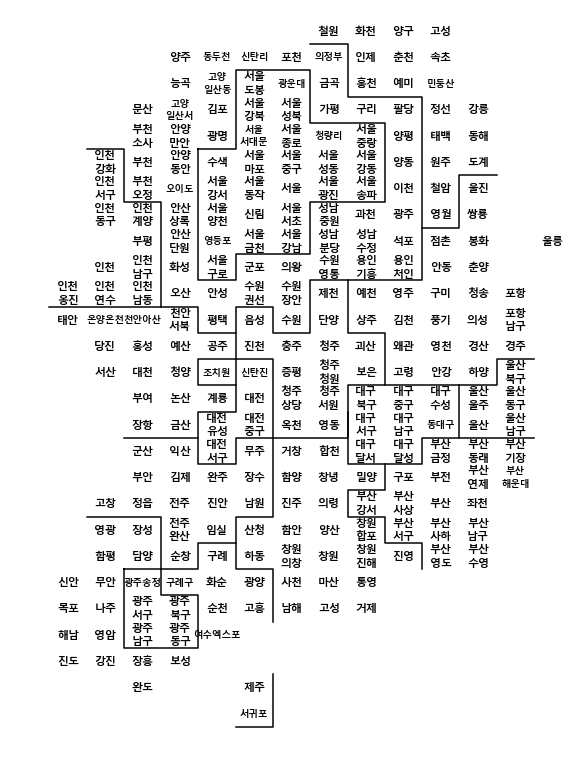

In [14]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
raw_data = pd.merge( draw_korea,raw_data, how='outer', on=['ID'])
raw_data.fillna(0, inplace=True)
raw_data.head()

,y,x,ID,서울,영등포,수원,평택,천안아산,조치원,신탄진,...,하동,광양,보성,화순,광명,울산,포항,탑승,하차,탑승-하차
0,0,7,철원,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,8,화천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,9,양구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,10,고성(강원),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,양주,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* 이제 위 raw_data 데이터에서 지도에 표현하고자 하는 데이터가 **탑승**이라면 이 값들이 아까 만든 각 해당 기차역에 위치하면 된다.

In [16]:
mapdata = raw_data.pivot_table(index='y', columns='x', values='탑승')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

In [17]:
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
1,NaN,NaN,NaN,0.000000,12.256918,12.574172,0.000000,8.524367,0.000000,9.217713,0.000000,NaN,NaN,NaN
2,NaN,NaN,NaN,13.275361,0.000000,0.000000,8.052933,5.673323,0.000000,9.829895,11.929363,NaN,NaN,NaN
3,NaN,NaN,9.435163,0.000000,0.000000,0.000000,0.000000,7.896553,0.000000,10.471695,9.892477,11.987332,NaN,NaN
4,NaN,NaN,0.000000,0.000000,13.198304,0.000000,0.000000,14.416798,0.000000,13.208692,11.846171,12.014888,NaN,NaN
5,NaN,0.000000,1.945910,0.000000,7.815207,0.000000,0.000000,0.000000,0.000000,11.549624,13.804395,11.306811,NaN,NaN
6,NaN,0.000000,0.000000,5.902633,0.000000,0.000000,16.984906,0.000000,0.000000,0.000000,11.483146,0.000000,NaN,NaN
7,NaN,0.000000,0.000000,0.000000,0.000000,8.798304,0.000000,0.000000,0.000000,12.315644,11.331332,7.421178,NaN,NaN
8,NaN,NaN,8.290544,0.000000,15.961358,0.000000,0.000000,0.000000,0.000000,11.753846,11.020660,9.560011,NaN,0.0


* 지도로 시각화 하기 위한 함수를 만든다

In [18]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[blockedMap[targetData]>0][targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

## 데이터 시각화

### 전체 기차역 탑승량 비교

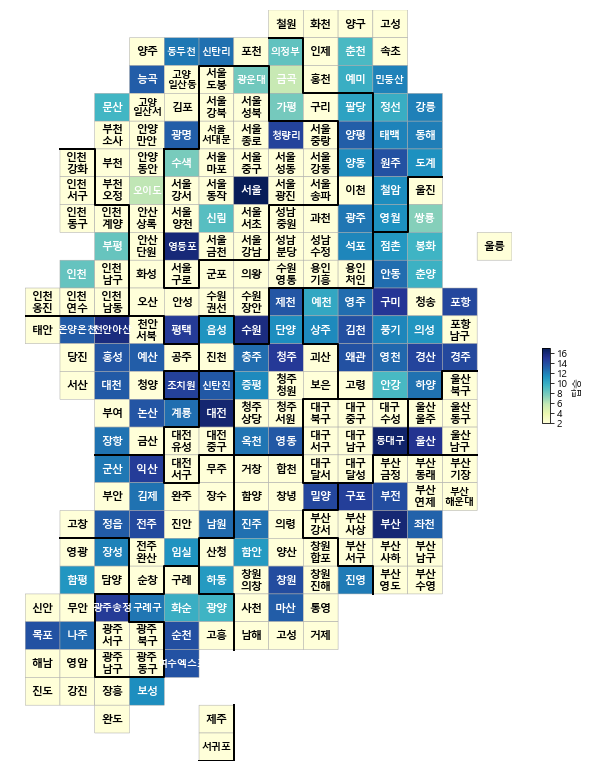

In [19]:
drawKorea('탑승', raw_data, 'YlGnBu')

* 각 **광역시, 도 별 주요 거점 역**들이 존재하여 그 역을 기준으로 주위 역의 이용이 높고 전체적으로 **서울, 부산, 대구, 대전 등 광역시**의 이용량이 높고 인구수 대비 **강원도 지역**의 수송량또한 전반적으로 많은 편으로 보인다. 

### 전체 기차역 하차량 비교

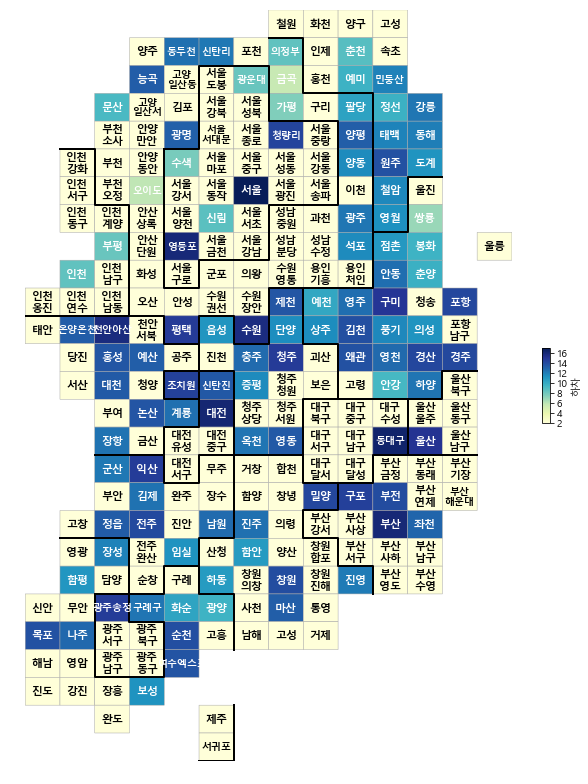

In [20]:
drawKorea('하차', raw_data, 'YlGnBu')

* 승차량과 하차량이 거의 비슷하다는 것을 알 수 있다. 따라서 코레일에서 **기차표를 판매할때 왕복권을 할인하여 파는 것과 같은 마케팅**을 한다면 소비자들의 니즈를 더 충족 시킬 수 있을 것이다.

### 주요 거점 역별 출발지 비교

#### 1. 서울

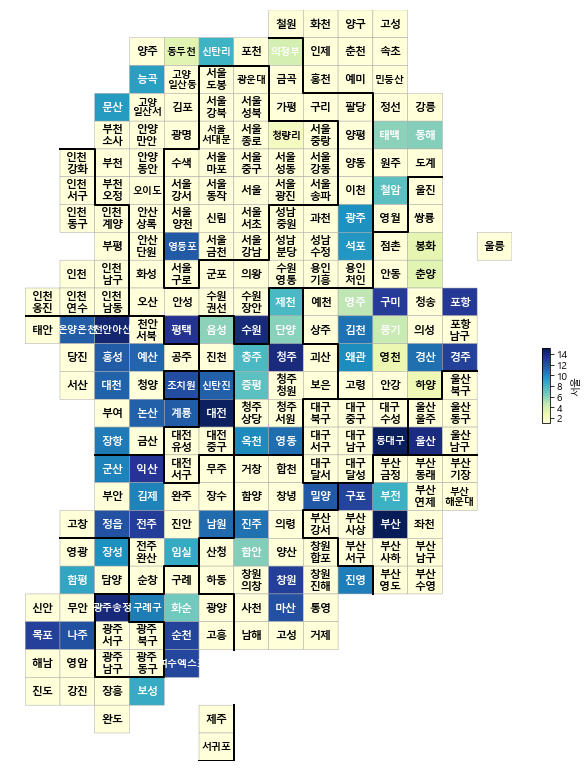

In [21]:
drawKorea('서울', raw_data, 'YlGnBu')

#### 2. 부산

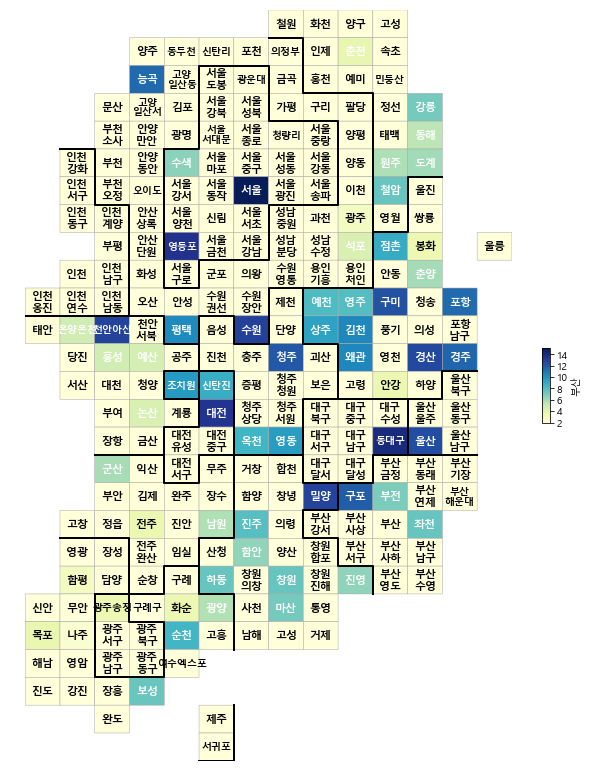

In [22]:
drawKorea('부산', raw_data, 'YlGnBu')

#### 3. 광주

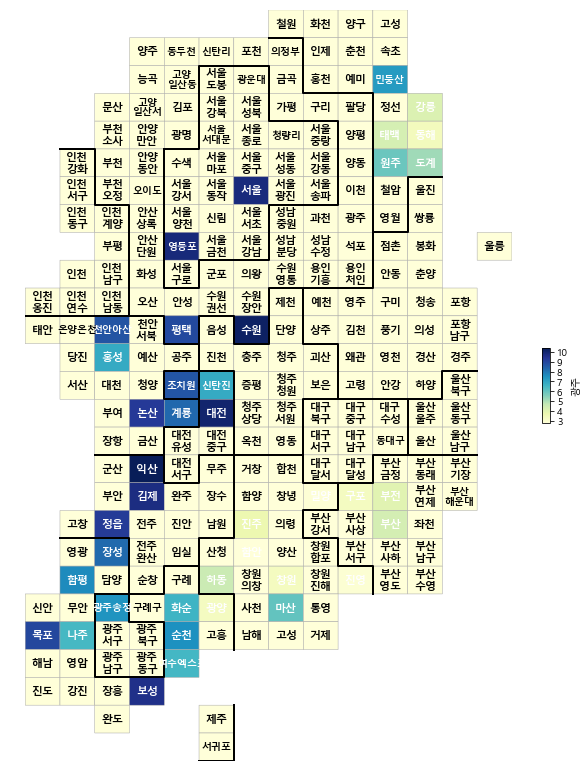

In [23]:
drawKorea('광주', raw_data, 'YlGnBu')

#### 4. 인천

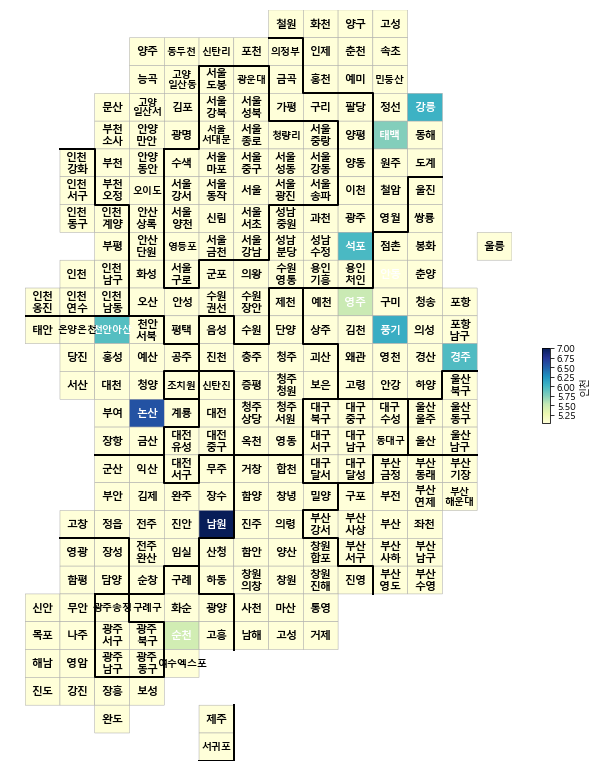

In [24]:
drawKorea('인천', raw_data, 'YlGnBu')

#### 5. 대전

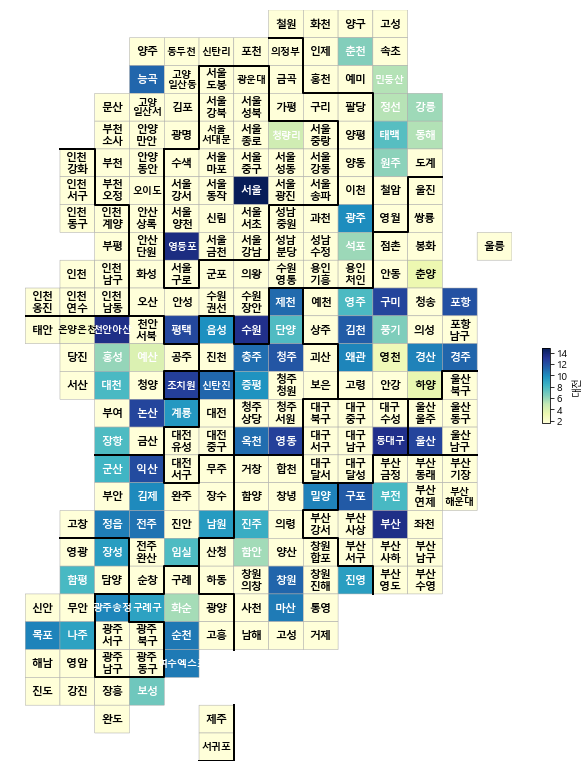

In [25]:
drawKorea('대전', raw_data, 'YlGnBu')

## 결론

#### 위의 자료를 이용하여 우리 지역에 많이 오는 지역을 조사하여 해당 지역와 같이 마케팅을 하면 더 큰 이율을 창출 할 수 있을 것이다.